### Analysis of the CIFAR10  dataset using AlexNet.

The Alexnet has eight layers with learnable parameters. The model consists of five layers with a combination of max pooling followed by 3 fully connected layers and they use Relu activation in each of these layers except the output layer.
In this project we will use AlexNet(Scratch) for muli-class classification.

In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 24.6 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.python.keras.models import Sequential,Input
import visualkeras

In [3]:
CIFAR10_CLASSES = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

170498071/170498071 [==============================] - 14s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


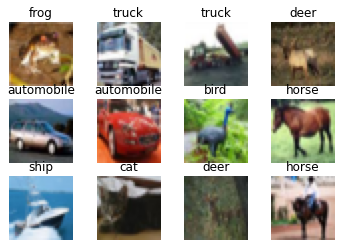

In [4]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
# plot first few images
for i in range(12):
    # define subplot
    plt.subplot(3,4,i+1)
    # plot raw pixel data
    plt.title(CIFAR10_CLASSES[train_labels[i][0]])
    plt.imshow(train_images[i])
    plt.axis('off')
# show the figure
plt.show()

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

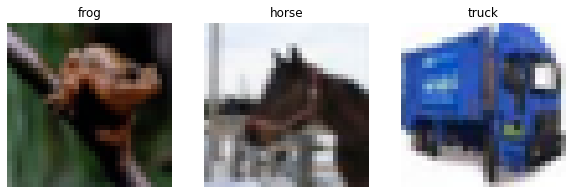

In [43]:
plt.figure(figsize=(10, 10))

for i in range(3):
    # show the figure
    plt.subplot(1,3,i+1)
    plt.imshow(train_images[i]) # Show random image
    plt.title(CIFAR10_CLASSES[train_labels[i][0]]) # Set title of the sub-plot
    plt.axis('off')
plt.show()

In [7]:
train_labels[0][0]

6

In [8]:
unique, counts = np.unique(train_labels, return_counts=True)

In [9]:
# Number of each labels
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

In [10]:
mapping = dict(zip(CIFAR10_CLASSES, range(len(train_labels))))

In [11]:
# Figure out what label corresponds to which numbers
mapping

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [12]:
train_images.max()

255

In [13]:
train_images.shape

(50000, 32, 32, 3)

In [14]:
train_images.shape[1:]

(32, 32, 3)

In [15]:
# Divide the train data into train and valid data
valid_images, valid_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [16]:
train_images.shape, valid_images.shape, test_images.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (10000, 32, 32, 3))

In [17]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import tensorflow as tf

In [18]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))

(227, 227, 3)


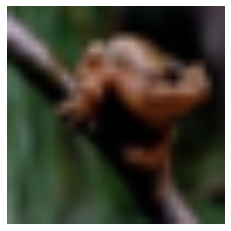

(227, 227, 3)


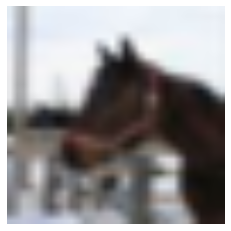

In [19]:
width=227
height=227


def resize_preprocess(image, label):
    image = tf.image.resize(image, (height, width)) / 255.0
    return image, label


train_dataset = train_ds.map(resize_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset  = test_ds.map(resize_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
valid_dataset = valid_ds.map(resize_preprocess, num_parallel_calls=tf.data.AUTOTUNE)

# plot two images from the train dataset
for image, label in train_dataset.take(2):
    print(image.shape)
    plt.imshow(image), plt.axis('off')
    plt.show()

(227, 227, 3)


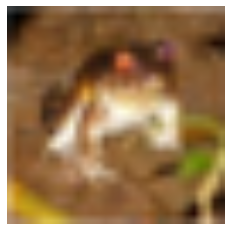

In [20]:
# plot images from the valid dataset
for image, label in valid_dataset.take(1):
    print(image.shape)
    plt.imshow(image), plt.axis('off')
    plt.show()

In [21]:
train_ds_size = tf.data.experimental.cardinality(train_dataset).numpy()
test_ds_size = tf.data.experimental.cardinality(test_dataset).numpy()
valid_ds_size = tf.data.experimental.cardinality(valid_dataset).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", valid_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [22]:
train_ds = (train_dataset.batch(batch_size=32, drop_remainder=True))
valid_ds = (valid_dataset.batch(batch_size=32, drop_remainder=True))
test_ds = (test_dataset.batch(batch_size=32, drop_remainder=True))

In [23]:
test = test_ds.unbatch()
images = list(test.map(lambda x, y: x))
labels=list(test.map(lambda x, y: y))

In [24]:
for image, label in train_ds.take(1):
    print(image.shape)
    print(label)

(32, 227, 227, 3)
tf.Tensor(
[[6]
 [7]
 [9]
 [0]
 [5]
 [2]
 [3]
 [3]
 [3]
 [9]
 [0]
 [9]
 [2]
 [9]
 [1]
 [0]
 [2]
 [3]
 [9]
 [6]
 [6]
 [1]
 [6]
 [3]
 [7]
 [6]
 [2]
 [7]
 [0]
 [4]
 [8]
 [9]], shape=(32, 1), dtype=uint8)


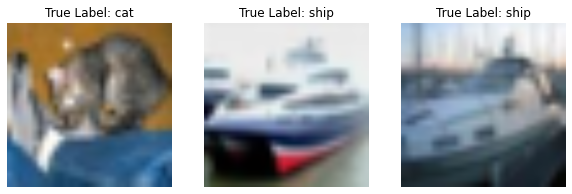

In [25]:
plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(f"True Label: {CIFAR10_CLASSES[labels[i][0]]}")
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

#### AlexNet Model

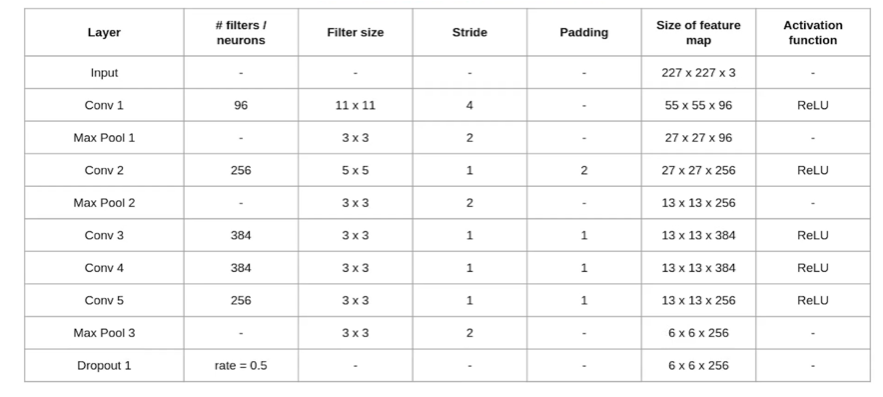

In [26]:
model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

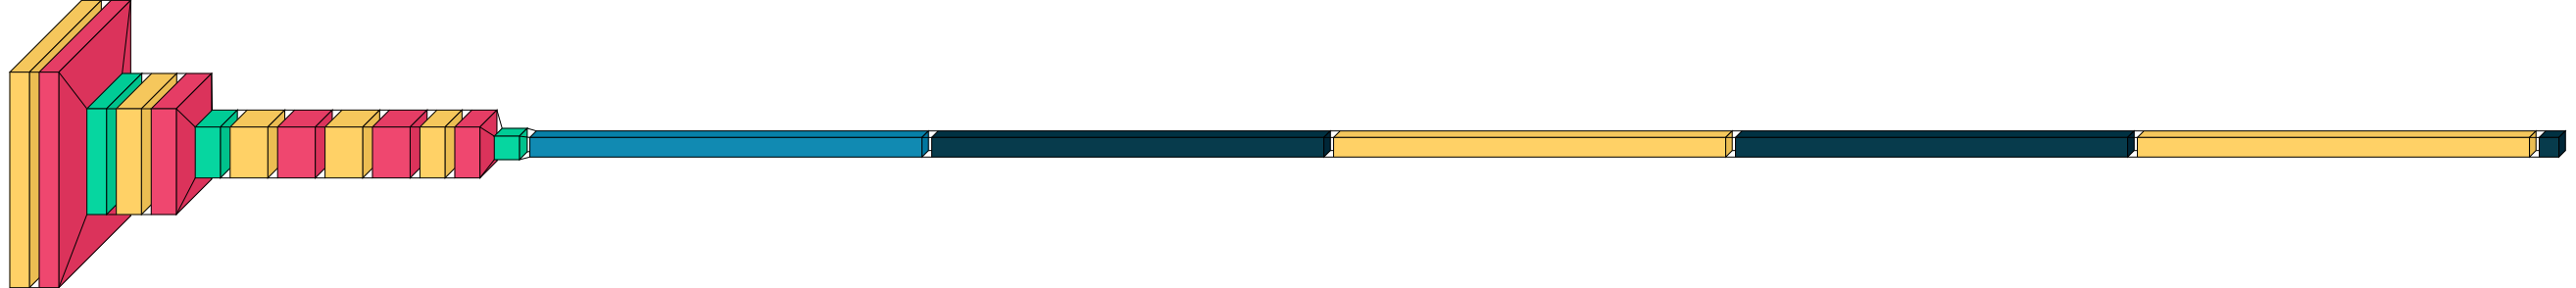

In [27]:
visualkeras.layered_view(model)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history=model.fit(train_ds,epochs=10, validation_data=valid_ds)

Epoch 1/10
1406/1406 [==============================] - 82s 52ms/step - loss: 2.6967 - accuracy: 0.2920 - val_loss: 1.7434 - val_accuracy: 0.3848
Epoch 2/10
1406/1406 [==============================] - 76s 54ms/step - loss: 1.7947 - accuracy: 0.3654 - val_loss: 1.7821 - val_accuracy: 0.3429
Epoch 3/10
1406/1406 [==============================] - 72s 51ms/step - loss: 1.6254 - accuracy: 0.4290 - val_loss: 1.6024 - val_accuracy: 0.4289
Epoch 4/10
1406/1406 [==============================] - 73s 52ms/step - loss: 1.3916 - accuracy: 0.5151 - val_loss: 1.1611 - val_accuracy: 0.6078
Epoch 5/10
1406/1406 [==============================] - 72s 51ms/step - loss: 1.1624 - accuracy: 0.5999 - val_loss: 1.2341 - val_accuracy: 0.5839
Epoch 6/10
1406/1406 [==============================] - 74s 52ms/step - loss: 0.9843 - accuracy: 0.6652 - val_loss: 0.8881 - val_accuracy: 0.6993
Epoch 7/10
1406/1406 [==============================] - 74s 52ms/step - loss: 0.8425 - accuracy: 0.7145 - val_loss: 0.9532 -

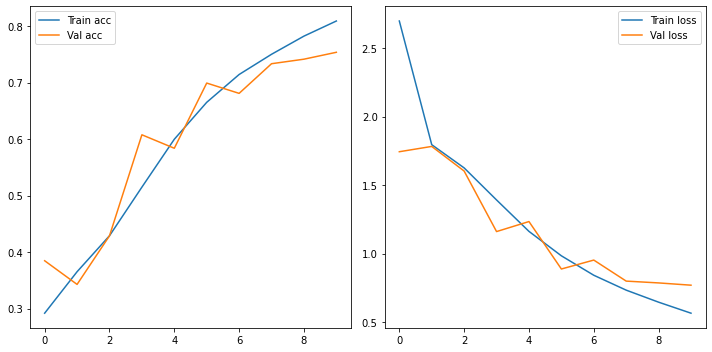

In [31]:
#Plot the learning curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Save the model in a h5 file
model.save('model.h5')

In [33]:
pred=model.predict(test_ds)

312/312 [==============================] - 8s 24ms/step


In [34]:
predict = np.argmax(pred, axis = 1)

In [35]:
predict

array([3, 8, 8, ..., 4, 6, 1])

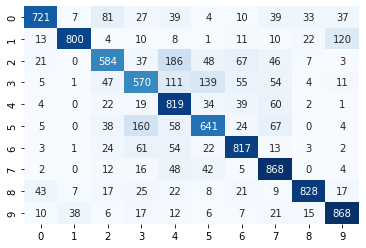

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(labels, predict)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)
plt.show()

In [37]:
test_loss, test_accuracy = model.evaluate(test_ds)

312/312 [==============================] - 8s 25ms/step - loss: 0.7744 - accuracy: 0.7528


In [38]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.7744460701942444
Test Accuracy: 0.7528044581413269


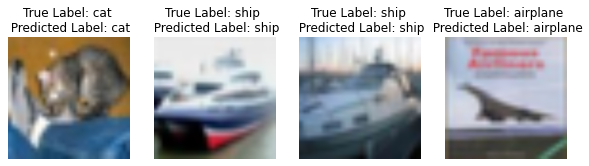

In [41]:
plt.figure(figsize=(10, 10))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title(f"True Label: {CIFAR10_CLASSES[labels[i][0]]} \n Predicted Label: {CIFAR10_CLASSES[predict[i]]}")
    plt.imshow(images[i].numpy())
    plt.axis('off')
plt.show()